# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
network_path = os.path.join("..", "networks", "lateral_onepop")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-volt-GABA90.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-volt-GABA90.hdf5")
duration = 5

# Plot network

In [ ]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

In [ ]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

# Plot neuron activity

## With lateral inhibtion

In [ ]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=simulation_file_with_synapses)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

In [ ]:
spr.plot_spike_histogram(label_text="lateral inhibition")

## Without lateral inhibition

In [ ]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=simulation_file_no_synapses)

spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

In [ ]:
spr_no.plot_spike_histogram(label_text="no inhibition")

# Summarising difference in activity (with and without lateral inhibition) -- GABA -90mV

In [ ]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,5))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

# Plot voltage in compartments

Loading network data ../networks/lateral_onepop
Loading simulation data ../networks/lateral_onepop/simulation/output-with-synapses-volt-GABA90.hdf5
Loading ../networks/lateral_onepop/simulation/output-with-synapses-volt-GABA90.hdf5
Loading morphology: /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/morphology/WT-0728MSN01-cor-rep-ax-res3-var1.swc


/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


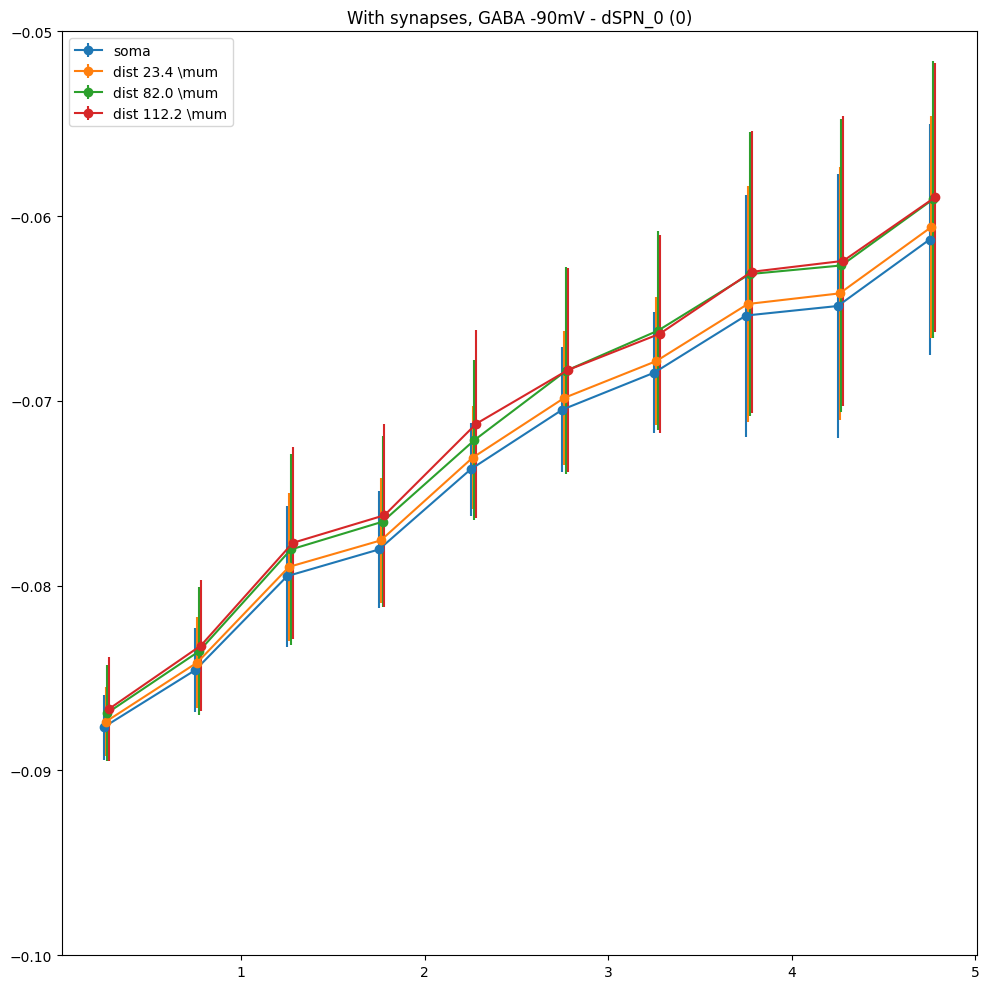

Loading morphology: /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20211026/morphology/WT-P270-20-15ak-cor-res3-var7.swc


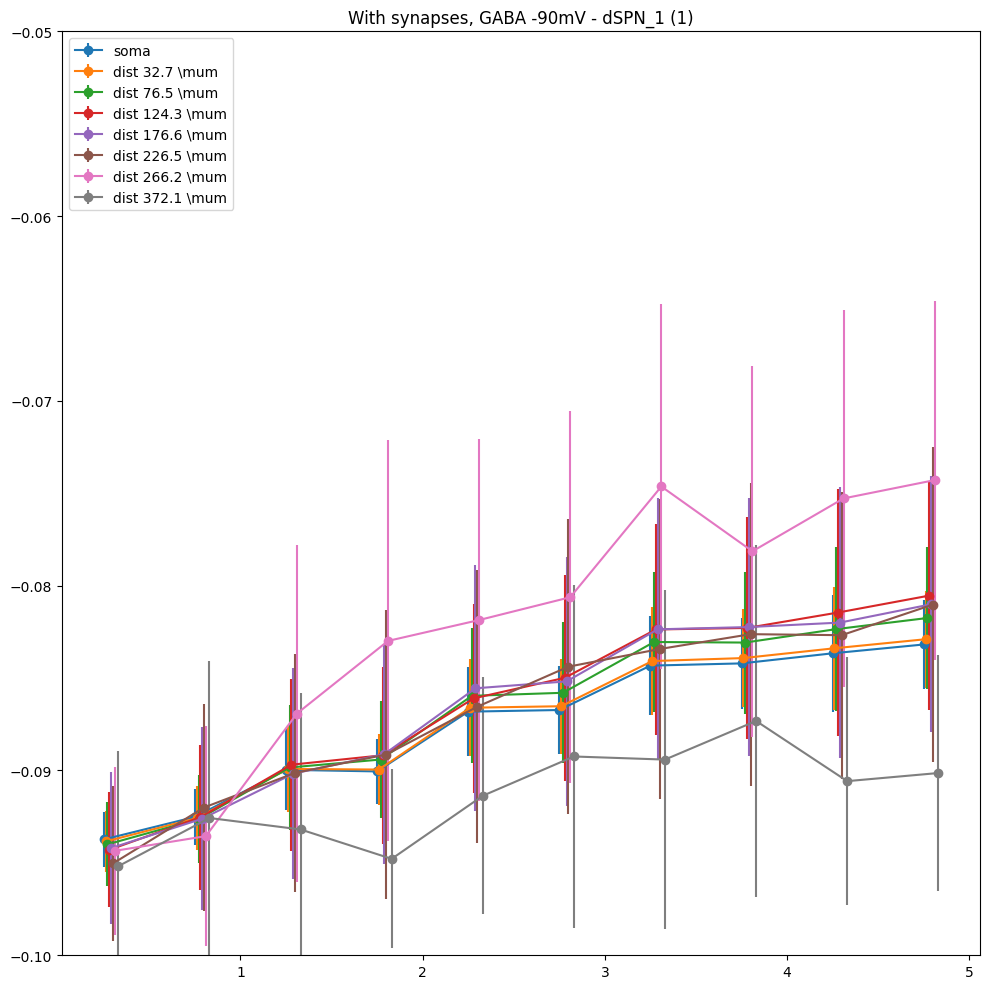

In [2]:
from snudda.plotting.plot_neuron_voltage import PlotNeuronVoltage

snudda_data = "../../../../../../BasalGangliaData/data/"

pnv = PlotNeuronVoltage(network_path=network_path,
                        network_file=network_path,
                        simulation_file=simulation_file_with_synapses,
                        snudda_data=snudda_data)

time_bins = [[0, 0.5], [0.5, 1], [1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 3.5], [3.5, 4], [4, 4.5], [4.5, 5], [5, 5.5]]


for neuron_id in range(0, 2):
    fig_name = os.path.join(network_path, "figures", f"dendritic_voltage-{neuron_id}-with-synapses-GABA90.png")
    
    pnv.plot_binned_neuron_voltage(neuron_id=neuron_id, time_bins=time_bins, title="With synapses, GABA -90mV", 
                                   fig_name=fig_name, y_range=(-0.1, -0.05),
                                   fig_size=(10,10))

Loading network data ../networks/lateral_onepop
Loading simulation data ../networks/lateral_onepop/simulation/output-no-synapses-volt-GABA90.hdf5
Loading ../networks/lateral_onepop/simulation/output-no-synapses-volt-GABA90.hdf5
Loading morphology: /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/morphology/WT-0728MSN01-cor-rep-ax-res3-var1.swc


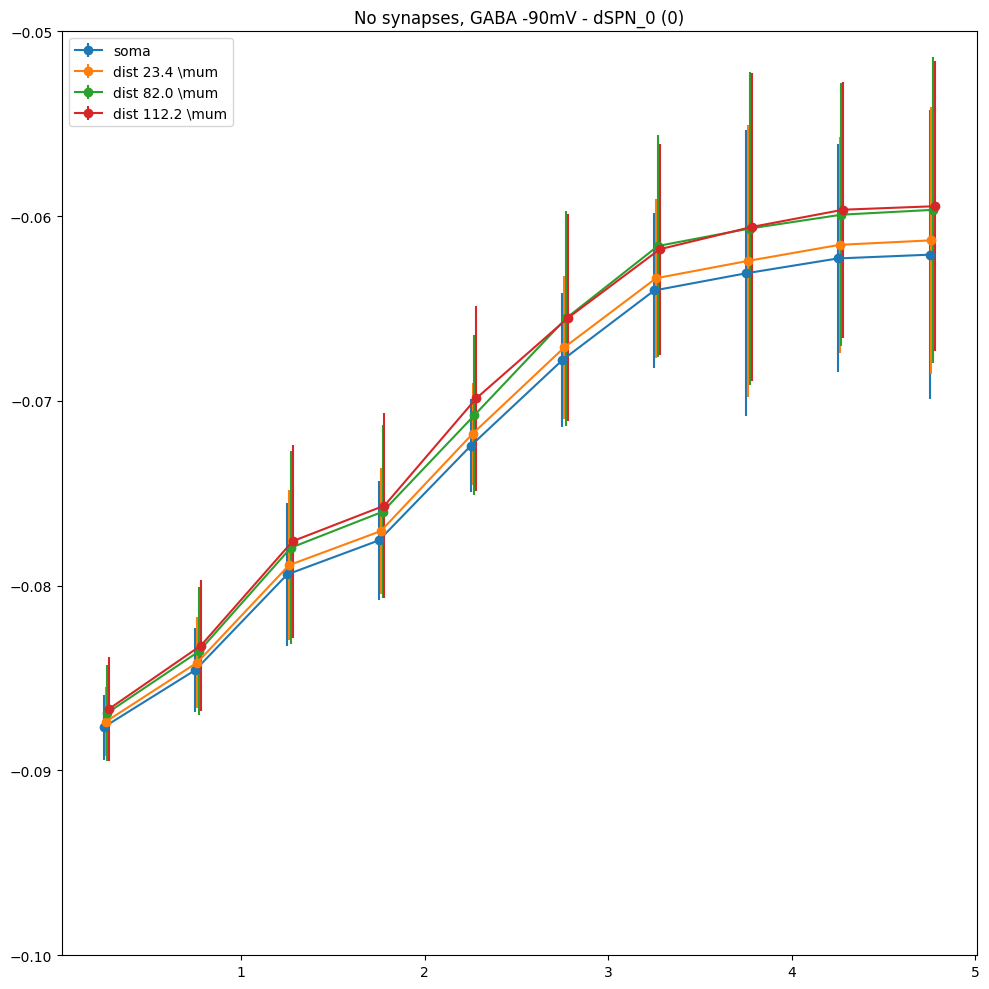

Loading morphology: /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20211026/morphology/WT-P270-20-15ak-cor-res3-var7.swc


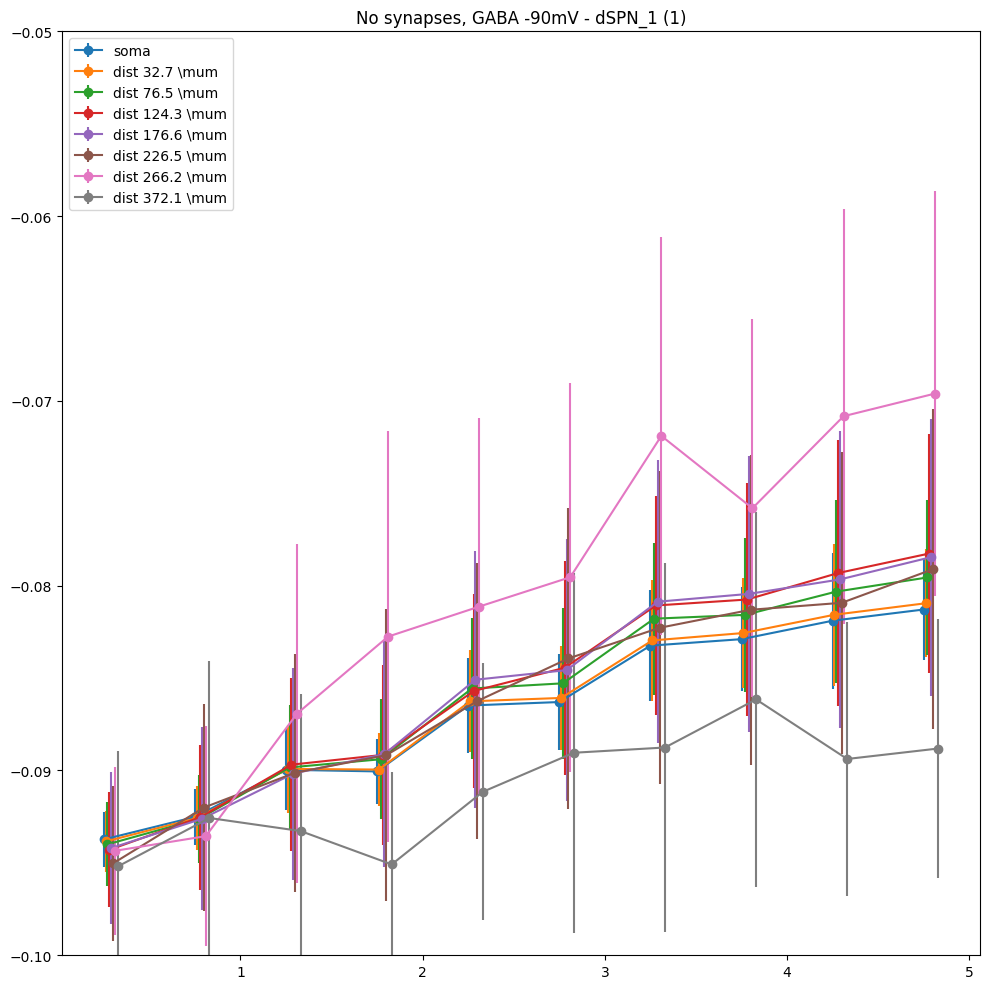

In [7]:
from snudda.plotting.plot_neuron_voltage import PlotNeuronVoltage

snudda_data = "../../../../../../BasalGangliaData/data/"

pnv2 = PlotNeuronVoltage(network_path=network_path,
                         network_file=network_path,
                         simulation_file=simulation_file_no_synapses,
                         snudda_data=snudda_data)

time_bins = [[0, 0.5], [0.5, 1], [1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 3.5], [3.5, 4], [4, 4.5], [4.5, 5], [5, 5.5]]

for neuron_id in range(0, 2):

    fig_name = os.path.join(network_path, "figures", f"dendritic_voltage-{neuron_id}-no-synapses-GABA90.png")

    pnv2.plot_binned_neuron_voltage(neuron_id=neuron_id, time_bins=time_bins, title=f"No synapses, GABA -90mV", 
                                    fig_name=fig_name, y_range=(-0.1, -0.05),
                                    fig_size=(10,10))

In [3]:
pnv.list_all_section_dist(neuron_id=0)

Loading morphology: /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/morphology/WT-0728MSN01-cor-rep-ax-res3-var1.swc
Section 0, center dist 20 um, length 34 um
Section 1, center dist 100 um, length 125 um
Section 2, center dist 98 um, length 122 um
Section 3, center dist 13 um, length 18 um
Section 4, center dist 88 um, length 131 um
Section 5, center dist 78 um, length 112 um
Section 6, center dist 12 um, length 17 um
Section 7, center dist 88 um, length 137 um
Section 8, center dist 76 um, length 111 um
Section 9, center dist 11 um, length 14 um
Section 10, center dist 22 um, length 9 um
Section 11, center dist 27 um, length 0 um
Section 12, center dist 61 um, length 69 um
Section 13, center dist 116 um, length 40 um
Section 14, center dist 136 um, length 81 um
Section 15, center dist 37 um, length 19 um
Section 16, center dist 105 um, length 119 um
Section 17, center dist 94 um, length 96 um
Section 18, center dist 111 um, 

Loading morphology: /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/morphology/WT-0728MSN01-cor-rep-ax-res3-var1.swc


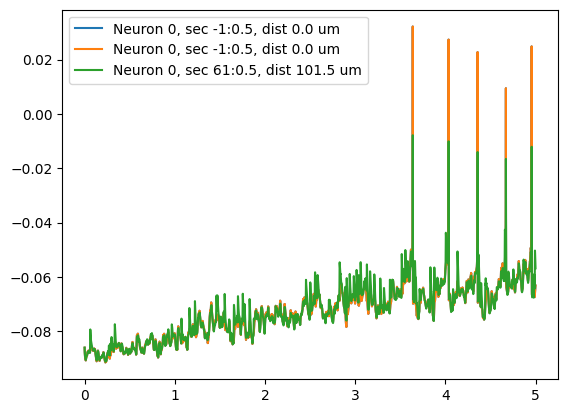

<Axes: >

In [9]:
section_id = [-1, 61]
pnv.plot_neuron_voltage(neuron_id=0,section_id=section_id)

Loading morphology: /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/morphology/WT-0728MSN01-cor-rep-ax-res3-var1.swc


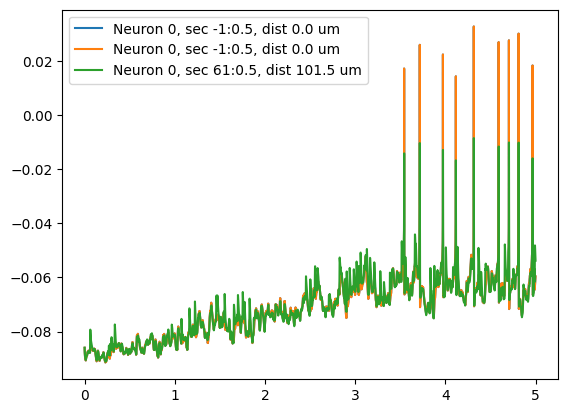

<Axes: >

In [10]:
pnv2.plot_neuron_voltage(neuron_id=0,section_id=section_id)